In [3]:
import pandas as pd
import numpy as np
import Bio as bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import plotly.express as px
import re
from ete3 import NCBITaxa

## NCBI BLAST of filtered for 500 rows with ComBLAST_bitscore closest to the mean


In [2]:
ncbi_500 = pd.read_csv('/Volumes/behavgenom$/John/data_exp_info/BT/FoldSeek/commercial_proteins/4_BLAST/2_NCBI_BLAST/_500/NCBI_BLAST_results_500.tsv', delimiter='\t')

In [5]:
print(ncbi_500['qseqid'].value_counts()) 

AF-M1AJ80-F1-model_v4        1166
AF-Q1WL37-F1-model_v4        1150
AF-A0A1S4BIG0-F1-model_v4    1111
AF-Q1WL51-F1-model_v4        1089
AF-A0A6N2AW41-F1-model_v4    1062
                             ... 
AF-A0A1C8FMT9-F1-model_v4     234
AF-A0A423DEQ7-F1-model_v4     207
AF-A0A2T0ZQY3-F1-model_v4     193
AF-S2KMF0-F1-model_v4         192
AF-A0A7U9L3Q3-F1-model_v4     183
Name: qseqid, Length: 334, dtype: int64


In [6]:
ncbi_500.columns

Index(['Unnamed: 0', 'qseqid', 'sseqid', 'pident', 'length', 'mismatch',
       'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore',
       'score', 'qlen', 'slen', 'qcovs', 'qcovhsp', 'qaccver', 'saccver',
       'qgi', 'sgi', 'qacc', 'sacc', 'qseq', 'sseq', 'positive', 'gaps',
       'ppos', 'frames', 'qframe', 'sframe', 'btop', 'staxids', 'sscinames',
       'scomnames', 'sblastnames', 'ss.kingdoms', 'stitle', 'salltitles',
       'sstrand', 'QuerySequence', 'FullSequence'],
      dtype='object')

In [7]:
# Filer the dataframe to only contain the top hit for each query sequence
ncbi_500_top_hit = ncbi_500.drop_duplicates(subset='qseqid', keep='first')

ncbi_500_top_hit['qseqid'].value_counts()

AF-A0A1Y3FAZ9-F1-model_v4    1
AF-A0A067NCW7-F1-model_v4    1
AF-A0A0F4ZDE5-F1-model_v4    1
AF-A0A2A8ZXA4-F1-model_v4    1
AF-A0A2B9SMQ7-F1-model_v4    1
                            ..
AF-A0A7V7L5B9-F1-model_v4    1
AF-A0A075TDN1-F1-model_v4    1
AF-A0A1S4BIG0-F1-model_v4    1
AF-A0A0E3NXI1-F1-model_v4    1
AF-A0A0C9W519-F1-model_v4    1
Name: qseqid, Length: 334, dtype: int64

Axes(0.125,0.11;0.775x0.77)


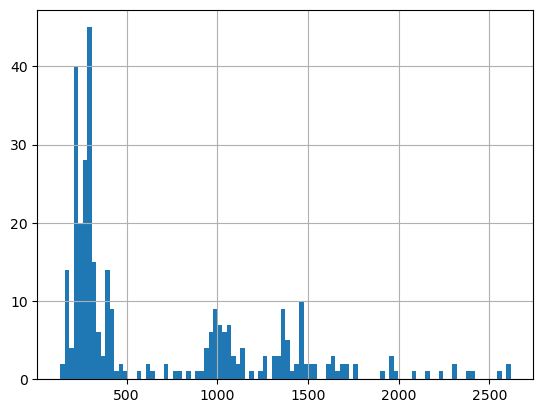

In [8]:
print(ncbi_500_top_hit['bitscore'].hist(bins=100))

Axes(0.125,0.11;0.775x0.77)


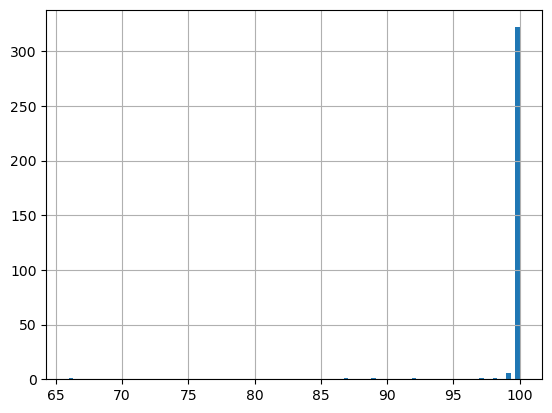

In [9]:
print(ncbi_500_top_hit['qcovhsp'].hist(bins=100))

Axes(0.125,0.11;0.775x0.77)


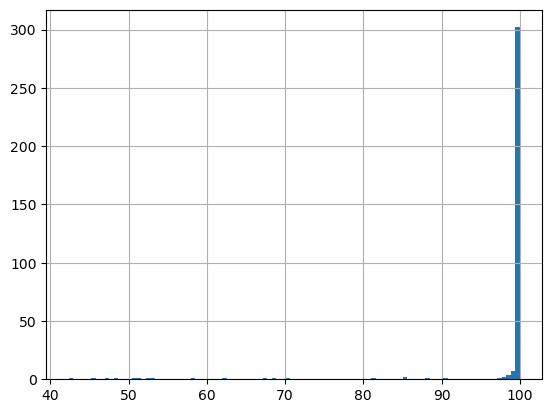

In [10]:
print(ncbi_500_top_hit['pident'].hist(bins=100))

In [23]:
ncbi_500_top_hit.to_csv('/Volumes/behavgenom$/John/data_exp_info/BT/FoldSeek/commercial_proteins/4_BLAST/2_NCBI_BLAST/_500/NCBI_BLAST_results_500_top_hit.csv', index=False)

BlockingIOError: [Errno 35] Resource temporarily unavailable: '/Volumes/behavgenom$/John/data_exp_info/BT/FoldSeek/commercial_proteins/4_BLAST/2_NCBI_BLAST/_500/NCBI_BLAST_results_500_top_hit.csv'

In [11]:
sskingdoms = ncbi_500_top_hit['ss.kingdoms']

In [12]:
sskingdoms

0         MAC/perforin domain-containing protein [Clavib...
631        MULTISPECIES: hypothetical protein [Pseudomonas]
888       proteinase inhibitor - cowpea [Vigna unguiculata]
1390      RecName: Full=Pesticidal crystal-like protein ...
1899      hypothetical protein [Niveispirillum sp. SYP-B...
                                ...                        
182884    insecticidal delta-endotoxin Cry8Ea1 family pr...
183414    insecticidal delta-endotoxin Cry8Ea1 family pr...
183941          Asp-hemolysin [Aspergillus fumigatus Af293]
184441    hypothetical protein M422DRAFT_267302 [Sphaero...
184941    hypothetical protein M422DRAFT_164791 [Sphaero...
Name: ss.kingdoms, Length: 334, dtype: object

/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_5340/2463911178.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_500_top_hit['Protein_Function'] = ncbi_500_top_hit['ss.kingdoms'].str.extract(r'^([\w\s\-]+)[\[\:]*')
/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_5340/2463911178.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Protein_Function', data=ncbi_500_top_hit, palette='viridis')


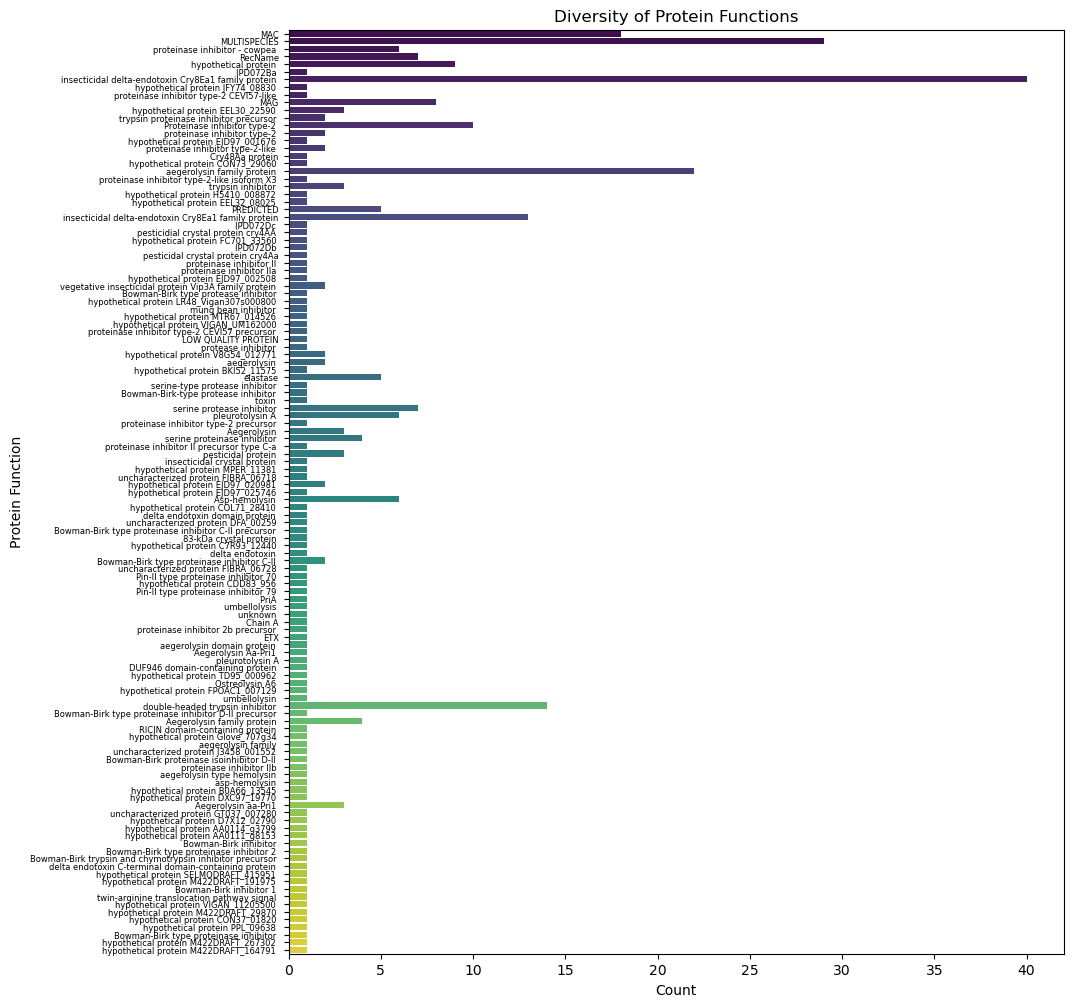

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Extract protein function
ncbi_500_top_hit['Protein_Function'] = ncbi_500_top_hit['ss.kingdoms'].str.extract(r'^([\w\s\-]+)[\[\:]*')

#Plot
plt.figure(figsize=(10, 12))

sns.countplot(y='Protein_Function', data=ncbi_500_top_hit, palette='viridis')
plt.title("Diversity of Protein Functions")
plt.xlabel("Count")
plt.ylabel("Protein Function")

# Adjust font size on y-axis
plt.yticks(fontsize=6)


plt.show()


/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_5340/1174427720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_500_top_hit['Protein_Function_lower'] = ncbi_500_top_hit['Protein_Function'].str.lower()
/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_5340/1174427720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_500_top_hit['Protein_Function_short'] = (
/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_5340/1174427720.py:17: FutureWarning: 

Passing `palette` 

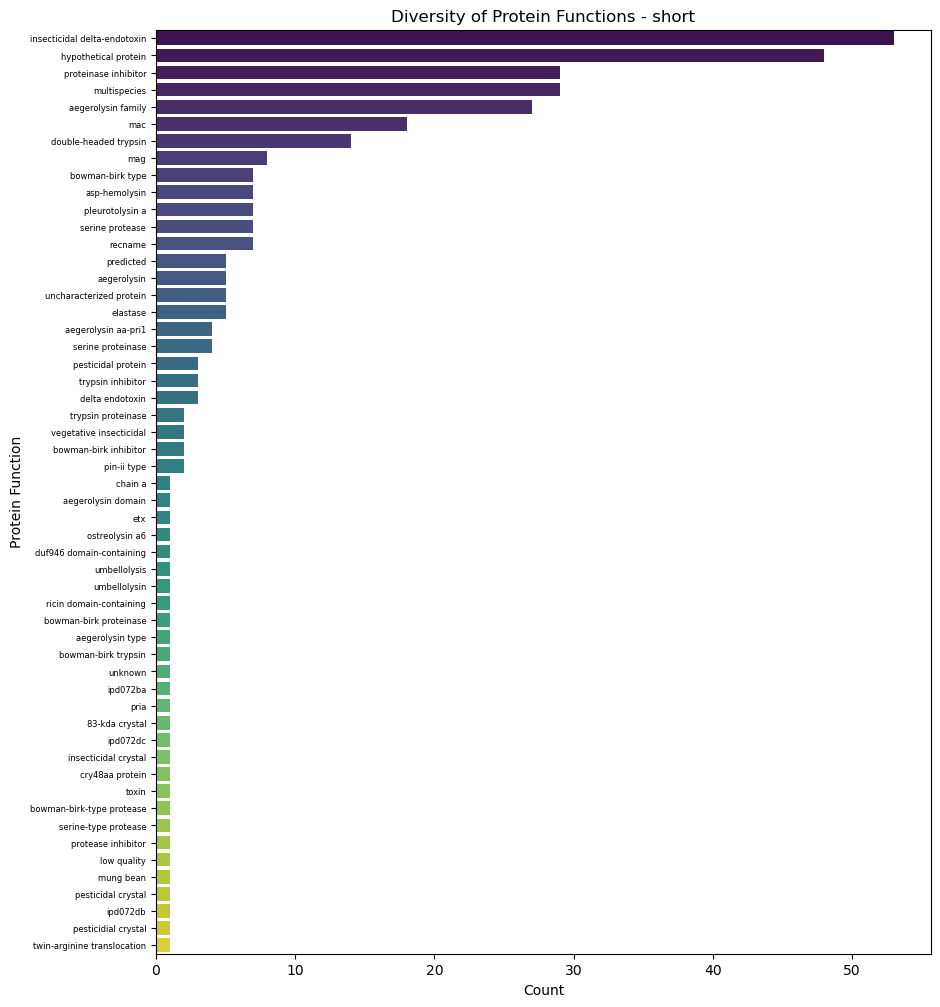

In [14]:
# Convert Protein Function column to lowercase
ncbi_500_top_hit['Protein_Function_lower'] = ncbi_500_top_hit['Protein_Function'].str.lower()

# Split the protein function to only contain the first two words
ncbi_500_top_hit['Protein_Function_short'] = (
    ncbi_500_top_hit['Protein_Function_lower']
    .str.split()
    .str[:2]
    .str.join(' ')
)

# Sort by value counts
order = ncbi_500_top_hit['Protein_Function_short'].value_counts().index

# Plot
plt.figure(figsize=(10, 12))
sns.countplot(
    y='Protein_Function_short',
    data=ncbi_500_top_hit,
    palette='viridis',
    order=order
)
plt.title("Diversity of Protein Functions - short")
plt.xlabel("Count")
plt.ylabel("Protein Function")

# Adjust font size on y-axis
plt.yticks(fontsize=6)

plt.show()



/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_5340/1044290252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_500_top_hit['Species'] = ncbi_500_top_hit['ss.kingdoms'].str.extract(r'\[(.*?)\]')


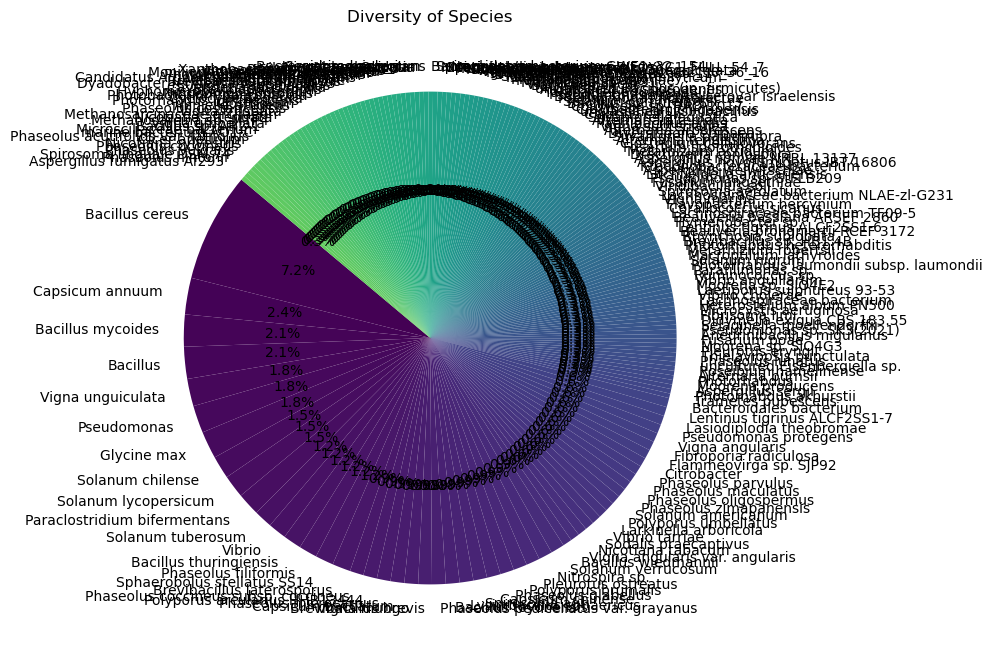

In [15]:
# Plot pie chart
ncbi_500_top_hit['Species'] = ncbi_500_top_hit['ss.kingdoms'].str.extract(r'\[(.*?)\]')
# Plot a bar chart

plt.figure(figsize=(8, 8))

species_counts = ncbi_500_top_hit['Species'].value_counts()

plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
plt.title("Diversity of Species")
plt.show()

/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_5340/1115976459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_500_top_hit['genus'] = ncbi_500_top_hit['Species'].str.split().str[0]


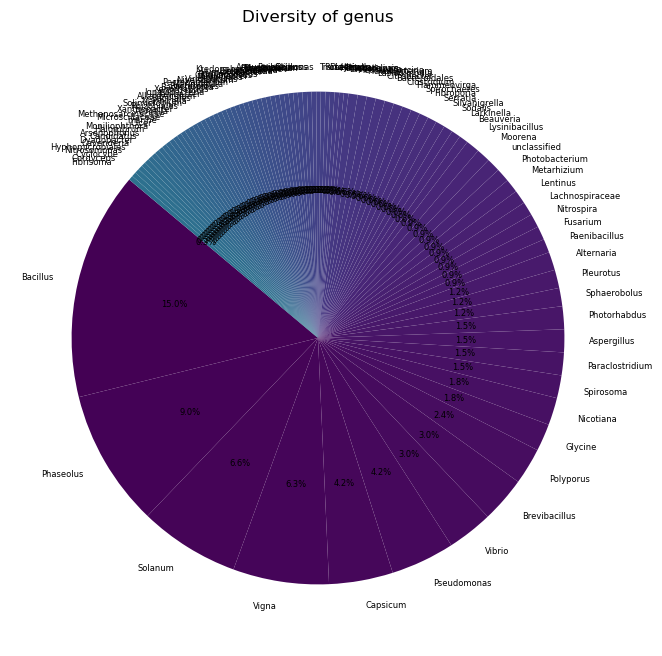

In [16]:
# Create 'genus' column by taking the first word from 'Species'
ncbi_500_top_hit['genus'] = ncbi_500_top_hit['Species'].str.split().str[0]

plt.figure(figsize=(8, 8))

species_counts = ncbi_500_top_hit['genus'].value_counts()

plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors, textprops={'fontsize': 6})

plt.title("Diversity of genus")
plt.show()

/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_5340/1253721365.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_500_top_hit['Kingdom'] = ncbi_500_top_hit['Species'].apply(get_kingdom)


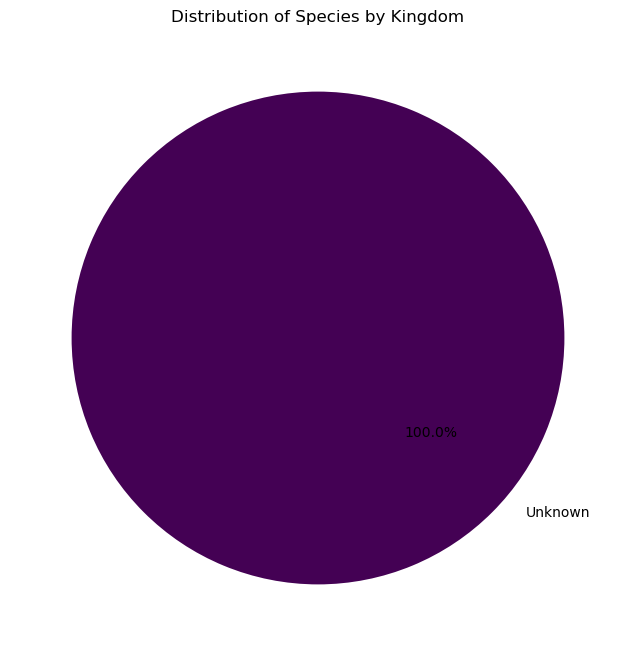

In [17]:
def get_kingdom(species):
    try:
        taxid = ncbi.get_name_translator([species])
        if taxid:
            lineage = ncbi.get_lineage(taxid[species][0])
            names = ncbi.get_taxid_translator(lineage)
            for rank in lineage:
                if names[rank] in ['Bacteria', 'Viruses', 'Fungi', 'Plantae', 'Animalia', 'Protista']:
                    return names[rank]
        return "Unknown"
    except:
        return "Unknown"

# Fetch kingdoms
ncbi_500_top_hit['Kingdom'] = ncbi_500_top_hit['Species'].apply(get_kingdom)

# Count occurrences of each kingdom
kingdom_counts = ncbi_500_top_hit['Kingdom'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(kingdom_counts, labels=kingdom_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
plt.title("Distribution of Species by Kingdom")
plt.show()

## NCBI BLAST 1000


In [3]:
ncbi_1000 = pd.read_csv('/Volumes/behavgenom$/John/data_exp_info/BT/FoldSeek/commercial_proteins/4_BLAST/2_NCBI_BLAST/_1000/NCBI_BLAST_results_1000.tsv', delimiter='\t')

In [5]:
# Filer the dataframe to only contain the top hit for each query sequence
ncbi_1000_top_hit = ncbi_1000.drop_duplicates(subset='qseqid', keep='first')

ncbi_1000_top_hit['qseqid'].value_counts()

AF-A0A1Y3FAZ9-F1-model_v4    1
AF-A0A2N6NS53-F1-model_v4    1
AF-A0A3Q7FH03-F1-model_v4    1
AF-J7ENS8-F1-model_v4        1
AF-A0A0H2WKA4-F1-model_v4    1
                            ..
AF-B2RGA5-F1-model_v4        1
AF-A0A559J082-F1-model_v4    1
AF-A0A397G4Z9-F1-model_v4    1
AF-A0A3B0M240-F1-model_v4    1
MGYP001122593261.pdb.gz      1
Name: qseqid, Length: 715, dtype: int64

Axes(0.125,0.11;0.775x0.77)


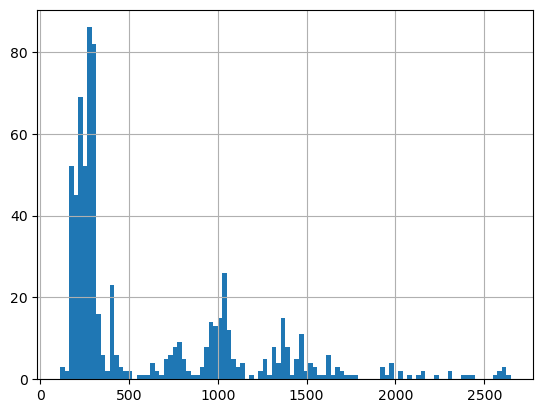

In [6]:
print(ncbi_1000_top_hit['bitscore'].hist(bins=100))

Axes(0.125,0.11;0.775x0.77)


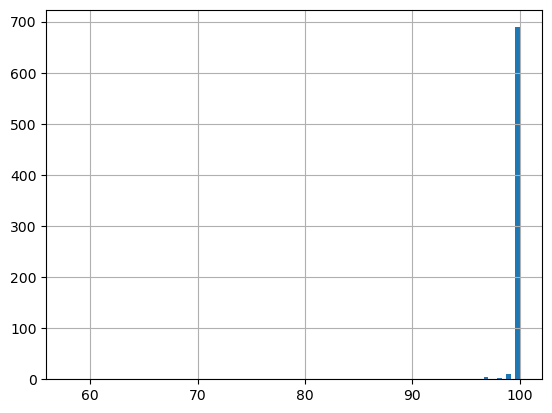

In [7]:
print(ncbi_1000_top_hit['qcovhsp'].hist(bins=100))

Axes(0.125,0.11;0.775x0.77)


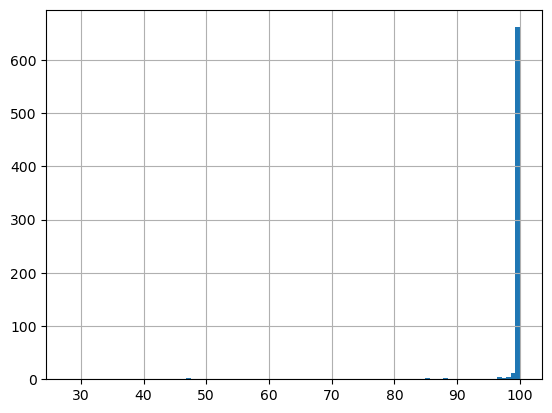

In [8]:
print(ncbi_1000_top_hit['pident'].hist(bins=100))

In [9]:
ncbi_1000_top_hit.to_csv('/Volumes/behavgenom$/John/data_exp_info/BT/FoldSeek/commercial_proteins/4_BLAST/2_NCBI_BLAST/_1000/NCBI_BLAST_results_1000_top_hit.csv', index=False)

/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_3665/2839787591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_1000_top_hit['Protein_Function'] = ncbi_1000_top_hit['ss.kingdoms'].str.extract(r'^([\w\s\-]+)[\[\:]*')
/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_3665/2839787591.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Protein_Function', data=ncbi_1000_top_hit, palette='viridis')


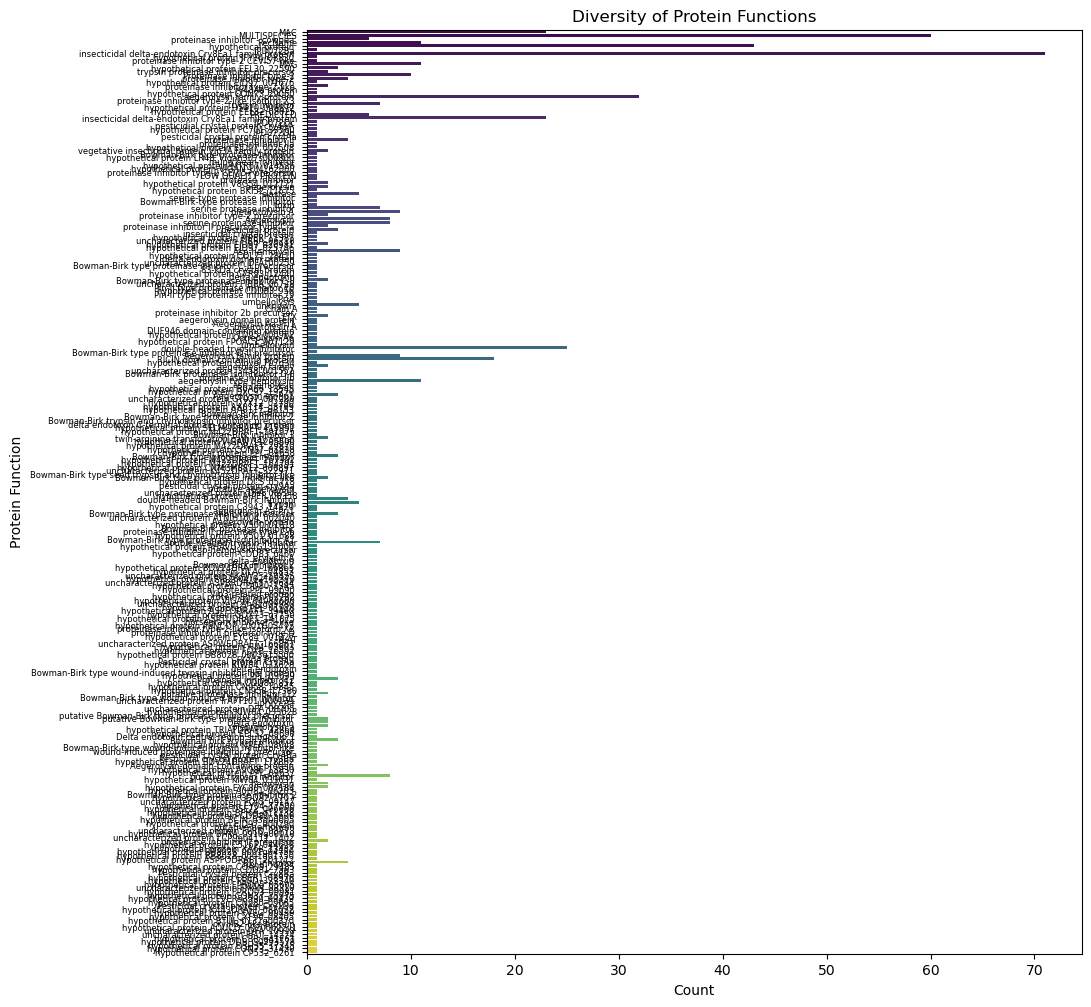

In [10]:
# Extract protein function
ncbi_1000_top_hit['Protein_Function'] = ncbi_1000_top_hit['ss.kingdoms'].str.extract(r'^([\w\s\-]+)[\[\:]*')

#Plot
plt.figure(figsize=(10, 12))

sns.countplot(y='Protein_Function', data=ncbi_1000_top_hit, palette='viridis')
plt.title("Diversity of Protein Functions")
plt.xlabel("Count")
plt.ylabel("Protein Function")

# Adjust font size on y-axis
plt.yticks(fontsize=6)


plt.show()

/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_3665/2749752515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_1000_top_hit['Protein_Function_lower'] = ncbi_1000_top_hit['Protein_Function'].str.lower()
/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_3665/2749752515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_1000_top_hit['Protein_Function_short'] = (
/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_3665/2749752515.py:17: FutureWarning: 

Passing `palett

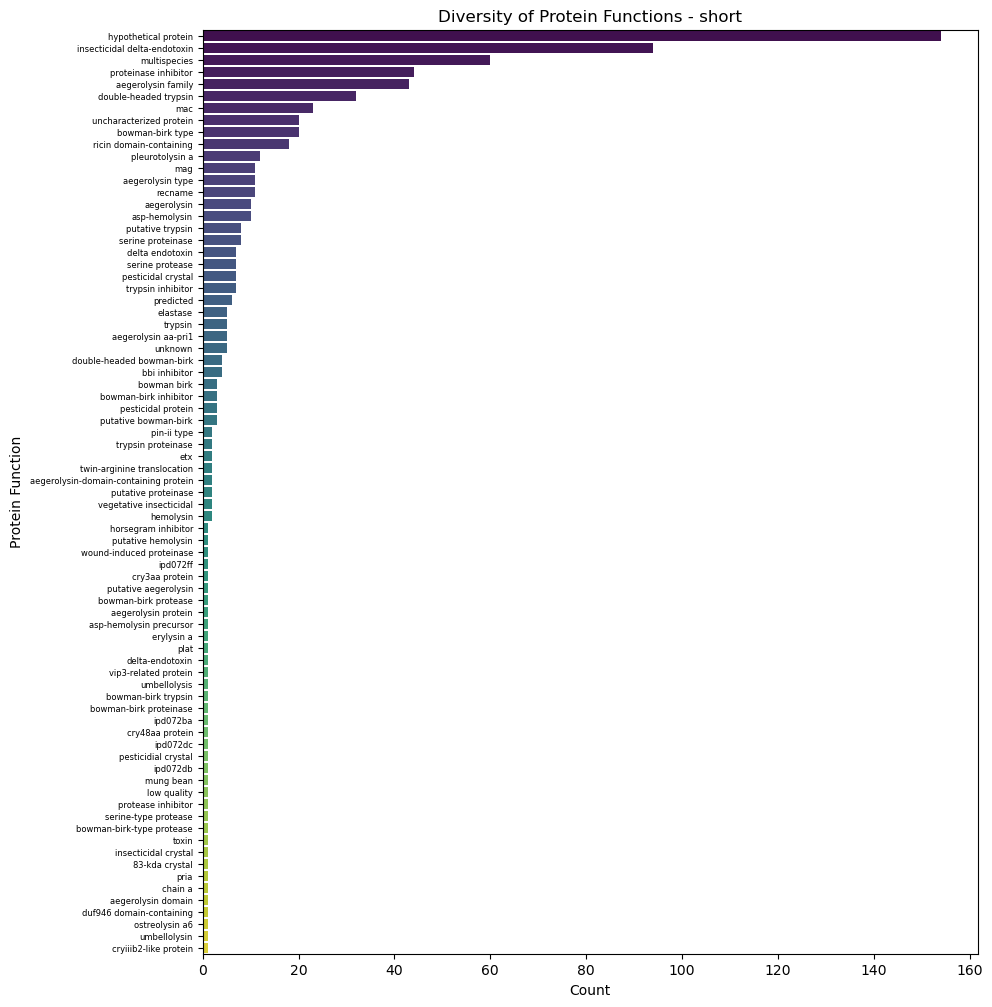

In [29]:
# Convert Protein Function column to lowercase
ncbi_1000_top_hit['Protein_Function_lower'] = ncbi_1000_top_hit['Protein_Function'].str.lower()

# Split the protein function to only contain the first two words
ncbi_1000_top_hit['Protein_Function_short'] = (
    ncbi_1000_top_hit['Protein_Function_lower']
    .str.split()
    .str[:2]
    .str.join(' ')
)

# Sort by value counts
order = ncbi_1000_top_hit['Protein_Function_short'].value_counts().index

# Plot
plt.figure(figsize=(10, 12))
sns.countplot(
    y='Protein_Function_short',
    data=ncbi_1000_top_hit,
    palette='viridis',
    order=order
)
plt.title("Diversity of Protein Functions - short")
plt.xlabel("Count")
plt.ylabel("Protein Function")

# Adjust font size on y-axis
plt.yticks(fontsize=6)

plt.show()



/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_3665/1447219722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_1000_top_hit['Species'] = ncbi_1000_top_hit['ss.kingdoms'].str.extract(r'\[(.*?)\]')


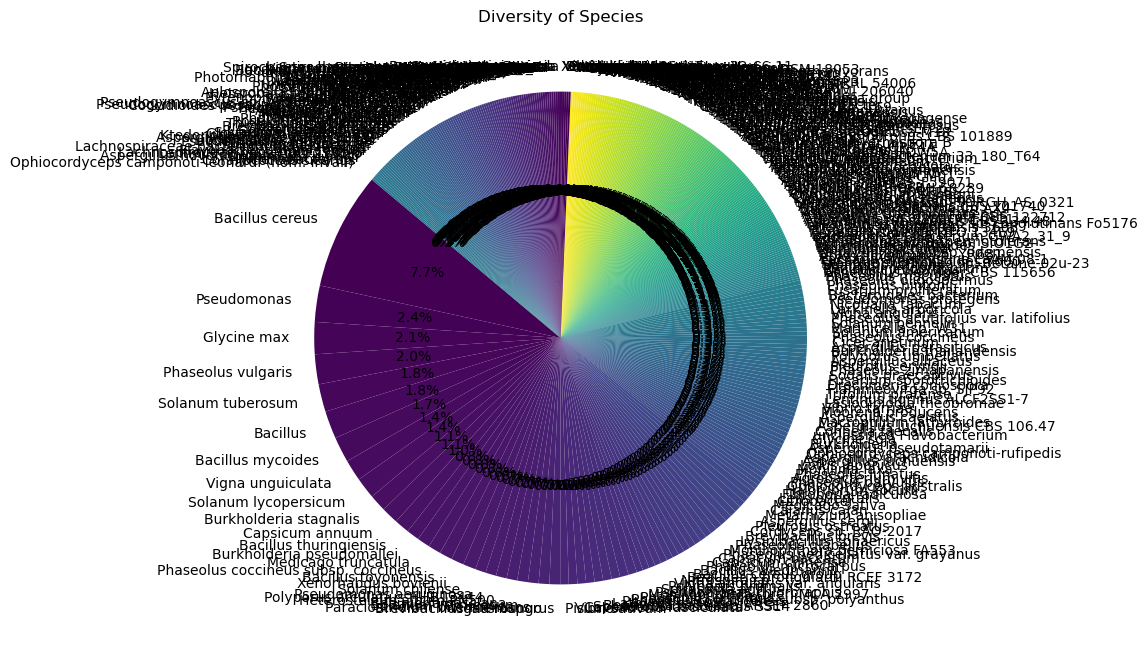

In [12]:
# Plot pie chart
ncbi_1000_top_hit['Species'] = ncbi_1000_top_hit['ss.kingdoms'].str.extract(r'\[(.*?)\]')
# Plot a bar chart

plt.figure(figsize=(8, 8))

species_counts = ncbi_1000_top_hit['Species'].value_counts()

plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
plt.title("Diversity of Species")
plt.show()

/var/folders/bz/jhtqqpy107ldkxyhp5pv18n40000gq/T/ipykernel_3665/3677098133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncbi_1000_top_hit['genus'] = ncbi_1000_top_hit['Species'].str.split().str[0]


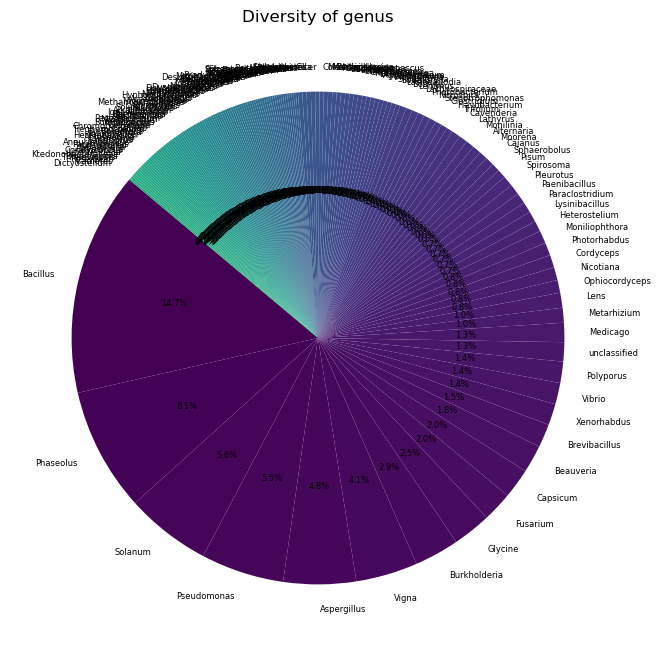

In [13]:
# Create 'genus' column by taking the first word from 'Species'
ncbi_1000_top_hit['genus'] = ncbi_1000_top_hit['Species'].str.split().str[0]

plt.figure(figsize=(8, 8))

species_counts = ncbi_1000_top_hit['genus'].value_counts()

plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors, textprops={'fontsize': 6})

plt.title("Diversity of genus")
plt.show()